# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [183]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [81]:
base = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [83]:
base

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [85]:
base.dtypes

Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
Complain               int64
WebPurchases           int64
dtype: object

In [87]:
base.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64

In [89]:
base['Income'].mean()

52247.25135379061

In [91]:
base.fillna({'Income': base['Income'].mean()}, inplace=True)
base.isnull().sum()

Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
WebPurchases         0
dtype: int64

In [93]:
label_encoder = LabelEncoder()
base['Education_encoded'] = label_encoder.fit_transform(base['Education'])
base['Marital_Status_encoded'] = label_encoder.fit_transform(base['Marital_Status'])
base = base.drop(['Education','Marital_Status'], axis=1)

In [95]:
base.dtypes

Year_Birth                  int64
Income                    float64
Kidhome                     int64
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
Complain                    int64
WebPurchases                int64
Education_encoded           int32
Marital_Status_encoded      int32
dtype: object

In [97]:
distribuicao = base['WebPurchases'].value_counts()
print(distribuicao)

WebPurchases
1    1128
0    1112
Name: count, dtype: int64


In [110]:
base

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Education_encoded,Marital_Status_encoded
0,1957,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,2,4
1,1954,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,2,4
2,1965,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,2,5
3,1984,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,2,5
4,1981,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,46,709,43,182,42,118,247,4,5,0,1,2,3
2236,1946,64014.0,2,56,406,0,30,0,0,8,5,7,0,1,4,5
2237,1981,56981.0,0,91,908,48,217,32,12,24,13,6,0,0,2,2
2238,1956,69245.0,0,8,428,30,214,80,30,61,10,3,0,1,3,5


<Axes: >

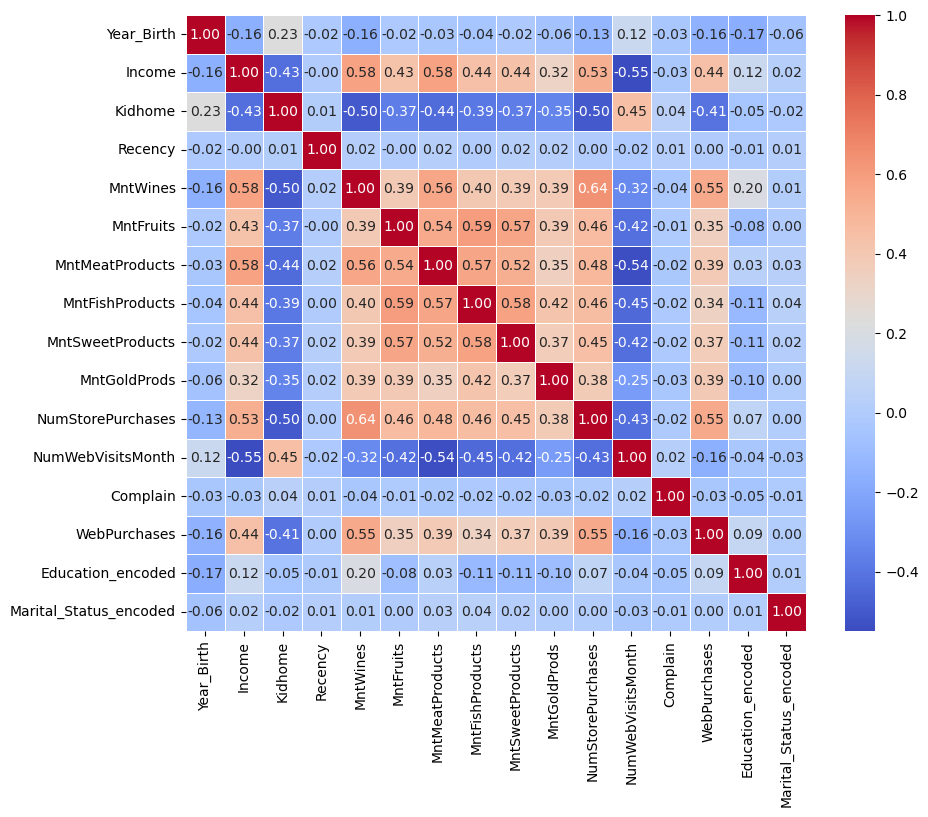

In [99]:
correlation_matrix = base.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

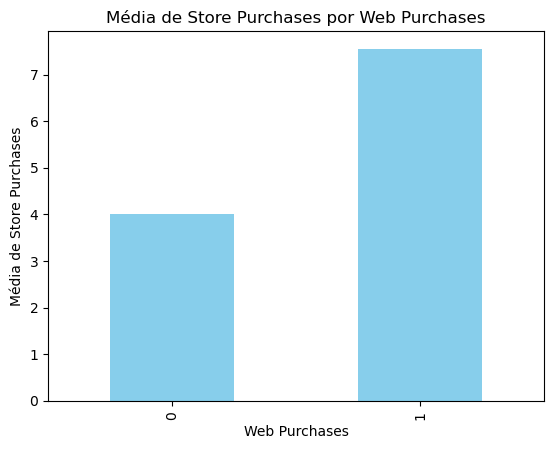

In [103]:
mean_store_purchases = base.groupby('WebPurchases')['NumStorePurchases'].mean()

mean_store_purchases.plot(kind='bar', color='skyblue')
plt.title('Média de Store Purchases por Web Purchases')
plt.xlabel('Web Purchases')
plt.ylabel('Média de Store Purchases')
plt.show()

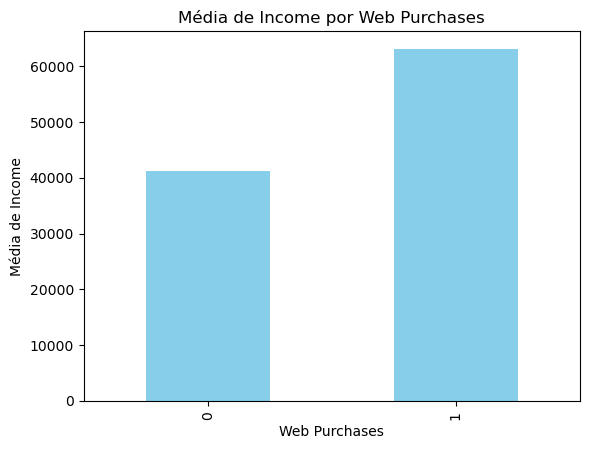

In [105]:
mean_income = base.groupby('WebPurchases')['Income'].mean()

mean_income.plot(kind='bar', color='skyblue')
plt.title('Média de Income por Web Purchases')
plt.xlabel('Web Purchases')
plt.ylabel('Média de Income')
plt.show()

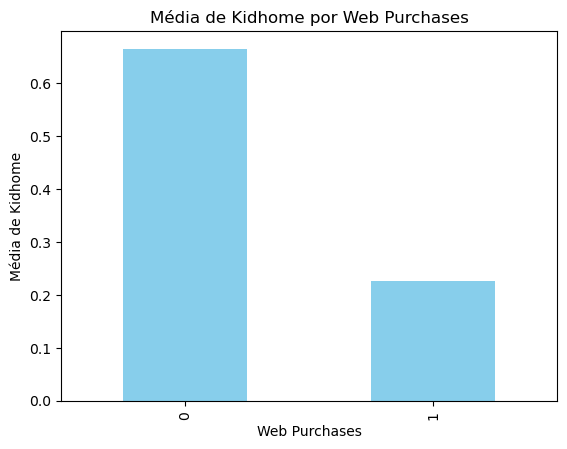

In [107]:
mean_kidhome = base.groupby('WebPurchases')['Kidhome'].mean()

mean_kidhome.plot(kind='bar', color='skyblue')
plt.title('Média de Kidhome por Web Purchases')
plt.xlabel('Web Purchases')
plt.ylabel('Média de Kidhome')
plt.show()

Podemos notar pelos gráficos e pela matriz de correlação que algumas variáveis estão altamente relacionadas ao número de compras online, sendo elas compras de produtos no geral, independente de qual seja, compra de produtos na loja física, renda anual, e número de filhos, sendo a última com uma relação negativa, pessoas que têm filho em casa tendem a comprar menos online.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [ ]:
# seu código aqui

A análise e a codificação foram feitas na etapa 1.

In [145]:
X = base.drop(columns=['WebPurchases'])

In [147]:
pca = PCA(n_components= 3)
pca.fit(X)

PCA(n_components=3)

In [149]:
explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()

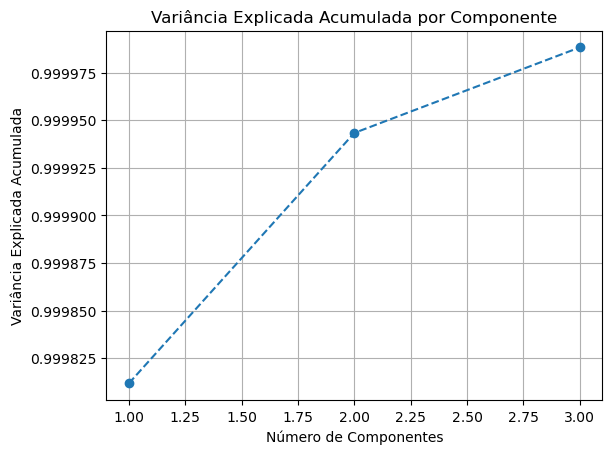

In [151]:
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

In [165]:
X_pca = pca.fit_transform(X)
Y = base['WebPurchases']

In [167]:
X_pca

array([[ 5895.27090899,   399.23441455,   243.88133741],
       [-5906.19133771,  -280.59590675,   -40.30266972],
       [19365.69988564,   -73.28129794,  -115.3877214 ],
       ...,
       [ 4738.46621339,   537.49672044,  -178.30518506],
       [16998.25223506,   -20.63250697,   -34.03864775],
       [  619.38030537,  -252.4162374 ,   -29.69057218]])

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

In [173]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [175]:
# seu código aqui
rf_model = RandomForestClassifier(random_state=42)

In [177]:
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [178]:
Y_pred = rf_model.predict(X_test_scaled)

In [181]:
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))

print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))

Matriz de Confusão:
[[162  39]
 [ 14 233]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       201
           1       0.86      0.94      0.90       247

    accuracy                           0.88       448
   macro avg       0.89      0.87      0.88       448
weighted avg       0.89      0.88      0.88       448



In [185]:
lg_model = LogisticRegression(max_iter=1000)

In [187]:
lg_model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [189]:
Y_pred_lg = lg_model.predict(X_test_scaled)

In [191]:
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_lg))

print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred_lg))

Matriz de Confusão:
[[163  38]
 [ 66 181]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       201
           1       0.83      0.73      0.78       247

    accuracy                           0.77       448
   macro avg       0.77      0.77      0.77       448
weighted avg       0.78      0.77      0.77       448



# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [ ]:
# seu código aqui

Bom, decidi usar o método tradicional para dividir a base em treino e teste, ao invés do Cross Validation, ainda não sinto total confiança, e baseado nisso, utilizei o Random Forest e a Regressão Logística, com o RF apresentando uma diferença significativa na previsão das compras online. Conseguimos obter uma acurácia de 88%, enquanto com a RL obtemos apenas 77%. Isso tudo após ter plotado gráfico e matrizes para conhecer melhor a base de dados, e depois de ter feito isso, aplicado o PCA na base de dados com o fim de reduzir as 15 colunas para um número menor, tendo conseguido assim, reduzir para apenas 3.